# Mask R-CNN - Visualize Trash detection


In [2]:
import os
import sys
import random
import math
import re
import time
import glob
import skimage
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project. 
# Change in case you want to put the notebook somewhere else.
ROOT_DIR = os.getcwd()
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from scipy.spatial import distance

from trash import trash

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Trash trained weights
TRASH_WEIGHTS_PATH = "weights/mask_rcnn_trash_0200_030519_large.h5" #the best

print('Weights being used: ', TRASH_WEIGHTS_PATH)

C:\Users\spenc\Uni Fourth Year\Capstone\Trash Detector Test\Trash_Detection


Using TensorFlow backend.


Weights being used:  weights/mask_rcnn_trash_0200_030519_large.h5


## Configurations

In [3]:
config = trash.TrashConfig()
TRASH_DIR = 'trash'
TRASH_DIR

'trash'

In [4]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.95
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE       

## Notebook Preferences

In [5]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [7]:
# Load validation dataset
dataset = trash.TrashDataset()
dataset.load_trash(TRASH_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 0
Classes: ['BG', 'trash']


## Load Model

In [8]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)

In [9]:
# Load the weights you trained
weights_path = os.path.join(ROOT_DIR, TRASH_WEIGHTS_PATH)
model.load_weights(weights_path, by_name=True)
print("Loading weights ", TRASH_WEIGHTS_PATH)

Loading weights  weights/mask_rcnn_trash_0200_030519_large.h5


## Select test images

In [10]:
# Get images from the directory of all the test images

#TODO: Change this so that it collects the data from the correct dirctory in the pi OR whever the pi sends it to the laptop

jpg = glob.glob("images/*.jpg")
jpeg = glob.glob("images/*.jpeg")
jpg.extend(jpeg)
jpg

['images\\1_test.jpg',
 'images\\test_2.jpg',
 'images\\test_3.jpg',
 'images\\test_4.jpg']

## Run detection on images

images\1_test.jpg
Processing 1 images
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
723.002766246437
[1273 1998]


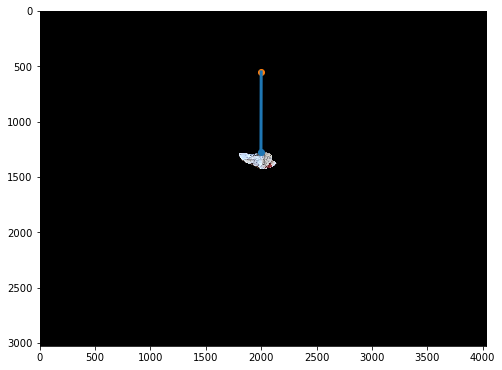

1584.8346916950045
[2124 1815]


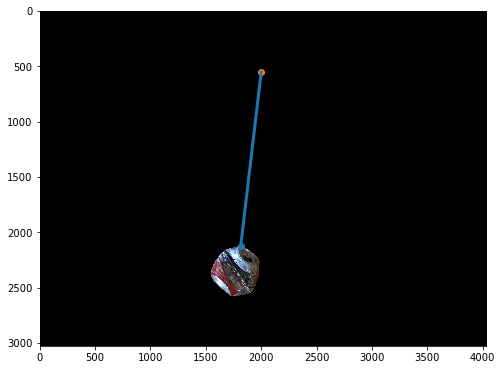

808.2177924297386
[1250 2404]


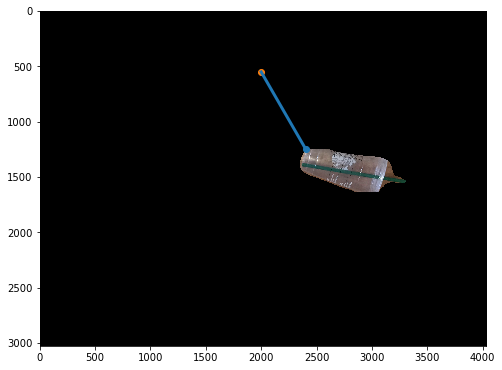

307.31905245200795
[ 488 1699]


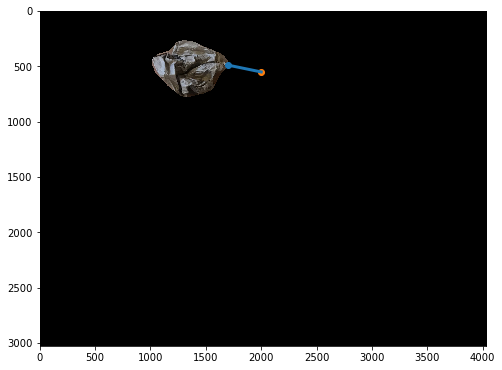

Shortest point is [ 488 1699] and the distance to it is: 307.31905245200795
Done
images\test_2.jpg
Processing 1 images
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
537.3602143813775
[1084 1940]


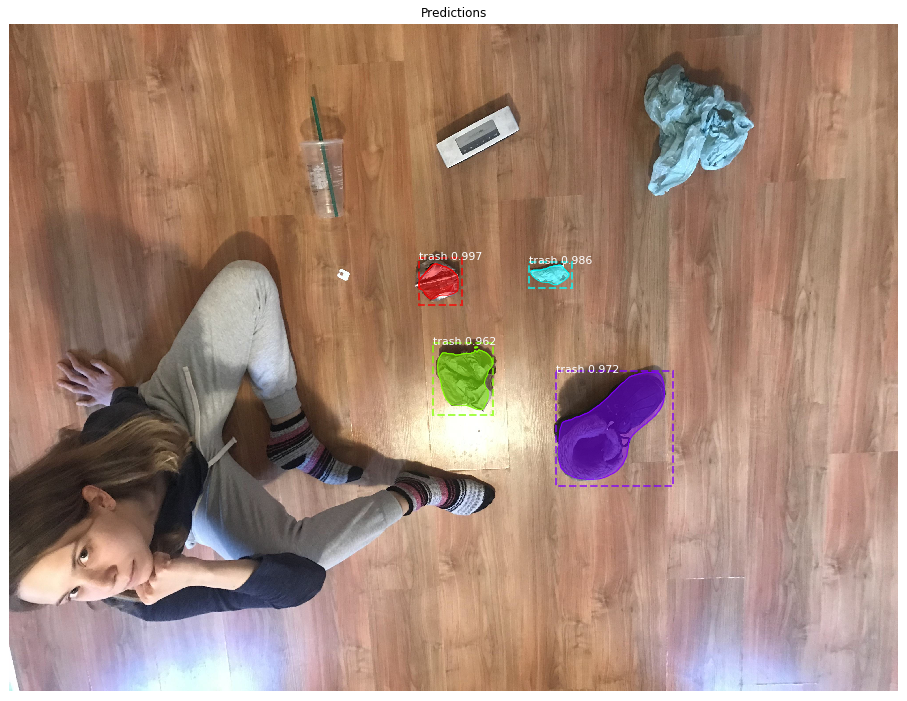

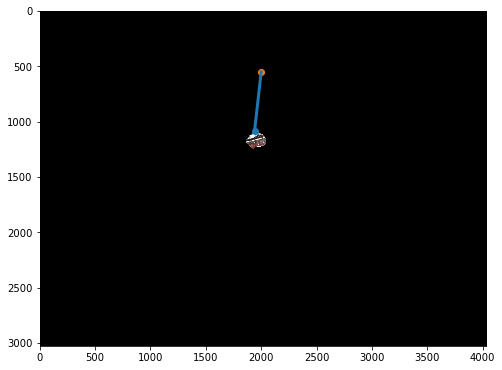

674.8229397404922
[1115 2369]


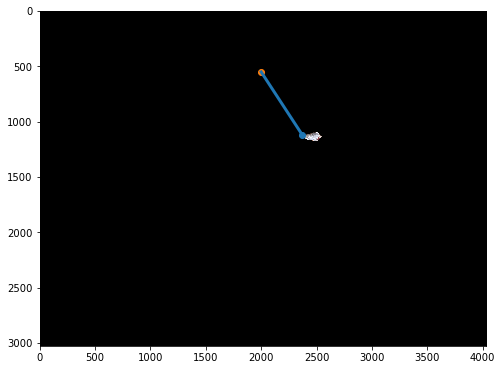

1325.7631764383864
[1598 2812]


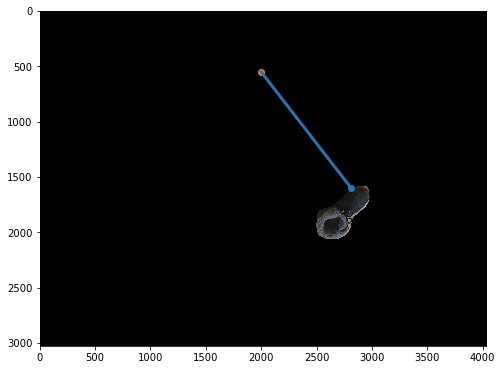

916.8664024818447
[1460 2112]


Shortest point is [1084 1940] and the distance to it is: 537.3602143813775
Done
images\test_3.jpg
Processing 1 images
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
511.45381023118796
[1054 2087]


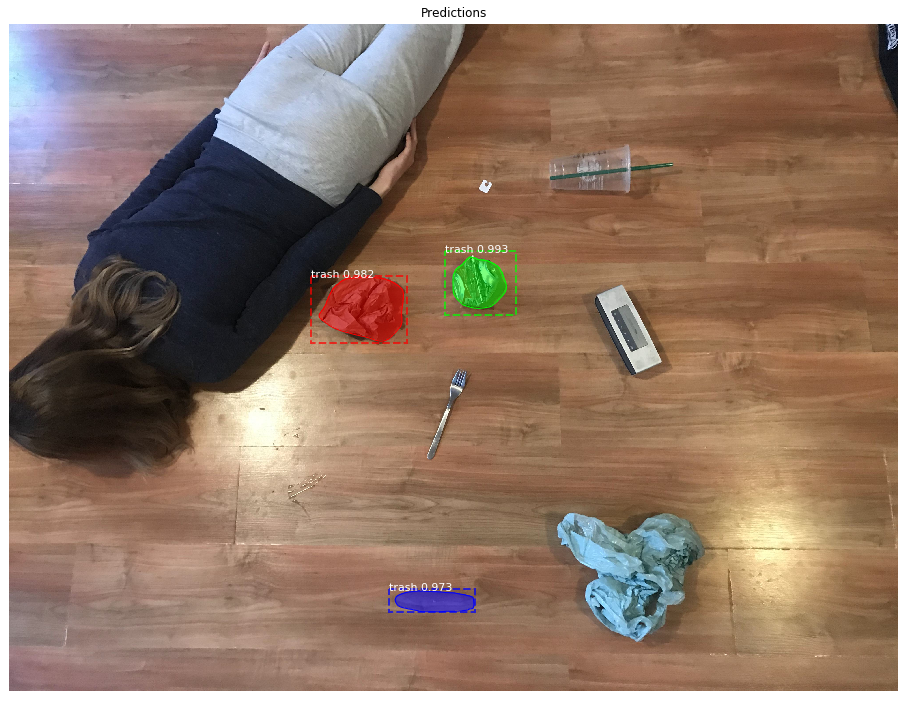

668.5095362072257
[1162 1731]


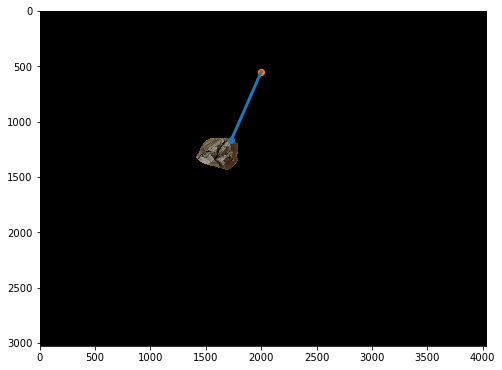

2021.4470064782802
[2568 1882]


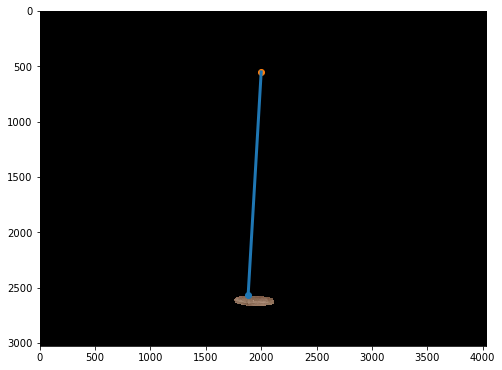

Shortest point is [1054 2087] and the distance to it is: 511.45381023118796
Done
images\test_4.jpg
Processing 1 images
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1772.7549181993545
[ 868 3744]


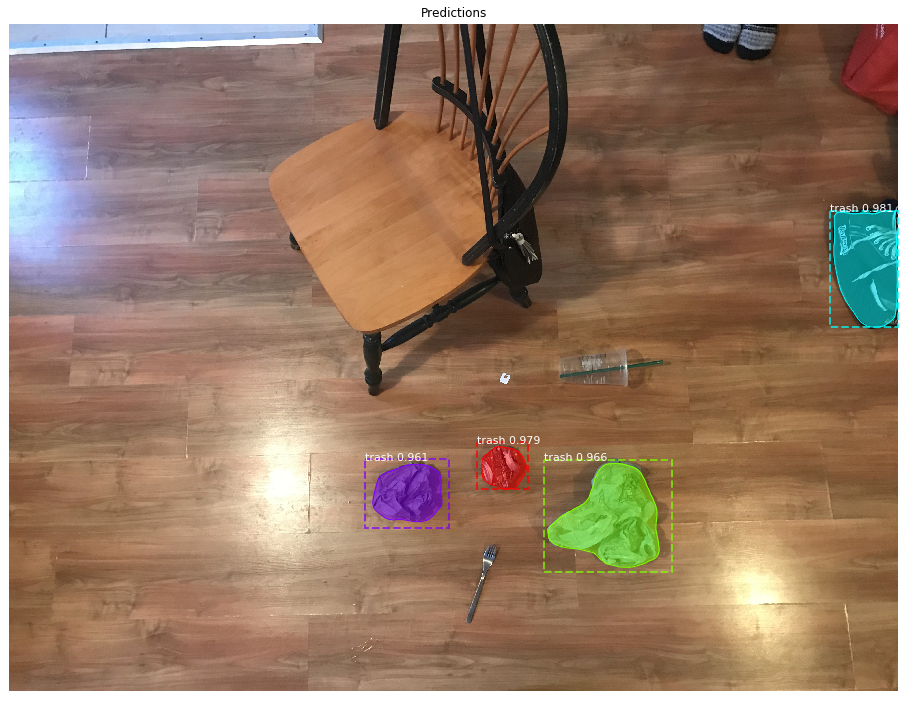

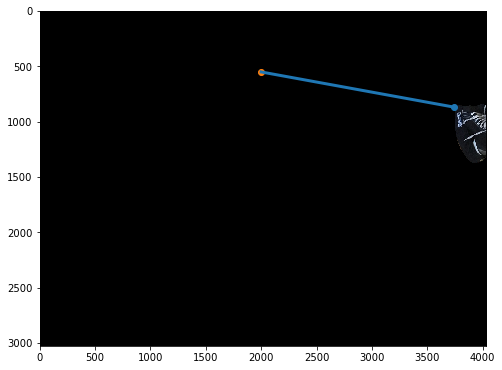

1379.6974305984627
[1913 2214]


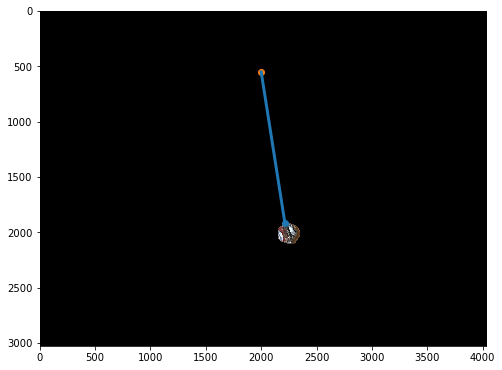

1607.7888542964838
[1994 2707]


1449.7754998619614
[1993 1860]


Shortest point is [1913 2214] and the distance to it is: 1379.6974305984627
Done


In [15]:
# This runs the detection on all images in the directory.

for image in jpg:
    ##image = jpg[2]
    print(image) # Print the image 
    image_temp = image # Save a temporary variable for image so that we can reread it after 
    image = skimage.io.imread('{}'.format(image))
    listOfShortest = []

    def f(x,y):
        return (x+y)*np.exp(-5.0*(x**2+y**2))

    # Run object detection
    results = model.detect([image], verbose=1)

    # Display results
    ax = get_ax(1)
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                dataset.class_names, r['scores'], ax=ax,
                                title="Predictions")
    ##print(r['masks'])

    mask = r['masks']
    mask = mask.astype(int)

    for i in range(mask.shape[2]):
        diffMaskNewArray = np.transpose(np.nonzero(mask[:,:,i] == 1)) # Changes the array so that we have an array of points were the mask is.
        shortestPoint = diffMaskNewArray[distance.cdist([(550,2000)], diffMaskNewArray, 'euclidean').argmin()] # Finds the closest point in the mask to a given point and stores that point.
        distanceToPoint = distance.cdist([(550,2000)], [shortestPoint], 'euclidean') # Stores the distance of that point. Currently stores it in a 2D array. Need to find a fix for this later
        distanceToPoint = distanceToPoint[0][0] #The value is currently written in a 2D array, this takes the value from that 2D array and stores it.
        print(distanceToPoint)
        print(shortestPoint)
        listOfShortest.append([shortestPoint,distanceToPoint,i]) # Add the point to a list of shortest. This can be changed later to just replace the stored value if the new one is closer.
        image = image_temp
        temp = skimage.io.imread('{}'.format(image))
        
        ## For loop to draw the masks on the original image
        for j in range(temp.shape[2]):
            temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
            
        plt.figure(figsize=(8,8))
        plt.imshow(temp)
        x = shortestPoint[0]
        y = shortestPoint[1]
        y,x = x,y ##Swap the x,y value of our point for printing
        shortestPoint = [x,y]
        plt.scatter(x,y)
        plt.scatter(2000,550)
        plt.plot([2000,x], [550,y], linewidth=3)
        plt.show()

    absoluteShortest = min(listOfShortest, key=lambda x: x[1])
    print("Shortest point is " + str(absoluteShortest[0]) + " and the distance to it is: " + str(absoluteShortest[1])) ##Print the distance to the shortest point.
    print("Done")